## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Build Network
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers

2025-03-12 12:57:37.824587: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# read the charity_data.csv from the provided cloud URL
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df["APPLICATION_TYPE"].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ("T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17")

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_count = application_df["CLASSIFICATION"].value_counts()
classification_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# Classification count less than 3

classification_count1 = classification_count[classification_count < 3]

# Display the result
print(classification_count1)

CLASSIFICATION
C3200    2
C1234    2
C1246    2
C1267    2
C1256    2
C2190    1
C4200    1
C2600    1
C5200    1
C1370    1
C1248    1
C6100    1
C1820    1
C1900    1
C1236    1
C3700    1
C2570    1
C1580    1
C1245    1
C2500    1
C1570    1
C1283    1
C2380    1
C1732    1
C1728    1
C2170    1
C4120    1
C8210    1
C2561    1
C4500    1
C2150    1
Name: count, dtype: int64


In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = ("C2190", "C4200", "C2600", "C5200", "C1370", "C1248", "C6100", "C1820", 
                              "C1900", "C1236", "C3700", "C2570", "C1580", "C1245", "C2500", "C1570", 
                              "C1283", "C2380", "C1732", "C1728", "C2170", "C4120", "C8210", "C2561", 
                              "C4500", "C2150", "C3200", "C1246", "C1234", "C1256", "C1267")
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
Other       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C2400        6
C4100        6
C1720        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
Name: count, dtype: int64

In [11]:
application_df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION              41
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [12]:
# Generate categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [13]:
# Create OneHotEncoder instance FOR CLASSIFICATION and APPLICATION_TYPE
enc = OneHotEncoder(sparse_output=False)

# Fit and Transform the OneHotEncoder using the categorical list
encode_app_df=pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_app_df.columns = enc.get_feature_names_out(application_cat)
encode_app_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot-encoded features and drop the originals
application_df = application_df.merge(encode_app_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)
application_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
X_features = len(X_train[0])
X_features

78

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
model = Sequential()

# First hidden layer
model.add(Dense(78, input_dim = 78, activation = 'relu'))

# Second hidden layer
model.add(Dense(30, activation = "relu"))

# Output layer
model.add(Dense(1, activation = "sigmoid"))

# Check the structure of the model
model.summary()

/opt/anaconda3/envs/my_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 78)             │         6,162 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,563 (33.45 KB)

 Trainable params: 8,563 (33.45 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# ModelCheckpoint: Save weights every 5 epochs
# EarlyStopping: Stop training if validation loss doesn't improve for 10 epochs
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights after stopping
)

# ModelCheckpoint: Save weights every 5 epochs
checkpoint_callback = ModelCheckpoint(
    filepath="Resources/original_model/weights/model_weights_epoch_{epoch:02d}.weights.h5",  # Save model weights with epoch number
    save_weights_only=True,  # Only save weights, not full model
    save_freq=5   # Save every 5 epochs
)

# Train the model with both callbacks
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),  # Validation set
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7047 - loss: 0.5965 - val_accuracy: 0.7221 - val_loss: 0.5628
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7295 - loss: 0.5556 - val_accuracy: 0.7226 - val_loss: 0.5620
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7267 - loss: 0.5542 - val_accuracy: 0.7237 - val_loss: 0.5617
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7331 - loss: 0.5495 - val_accuracy: 0.7245 - val_loss: 0.5592
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7368 - loss: 0.5405 - val_accuracy: 0.7227 - val_loss: 0.5607
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7424 - loss: 0.5387 - val_accuracy: 0.7241 - val_loss: 0.5573
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7362 - loss: 0.5424 - val_accuracy: 0.7235 - val_loss: 0.5586
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7319 - loss: 0.5450 - val_accu

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7269 - loss: 0.5546
Loss: 0.5546290278434753, Accuracy: 0.7268804907798767


In [22]:
# Export our model to HDF5 file
model.save('Resources/original_model/AlphabetSoupCharity.h5')

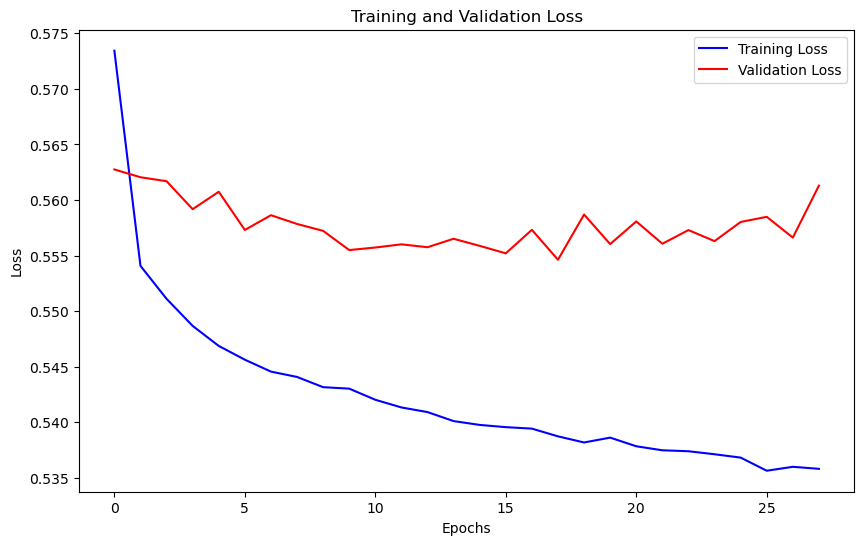

In [23]:
# Plot Training Loss and Validation Loss

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

# Add labels and title
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Save the chart
plt.savefig('Resources/training_validation_cost.png')

# Display the plot
plt.show()


# Random Forest Method to See the Features' Importance

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a random forest classifier
clf = RandomForestClassifier(random_state=78)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Report on feature importance
feature_importance = clf.feature_importances_

# Classification Report
#report = classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_test)])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      4003
           1       0.72      0.75      0.73      4572

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575



In [25]:
# Define feature names (if X is an array)
feature_names = application_df.drop(columns=["IS_SUCCESSFUL"]).columns.tolist()

# Combine feature names with their importance values
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Convert to a Pandas DataFrame and sort by importance
feature_importance_df = pd.DataFrame(
    feature_importance_dict.items(), columns=["Feature", "Importance"]
).sort_values(by="Importance", ascending=False)

# Display the sorted feature importance
print(feature_importance_df)

# Export feature importance to CSV
feature_importance_df.to_csv("Resources/feature_importance.csv", index=False)

                         Feature  Importance
1                        ASK_AMT    0.391582
11  AFFILIATION_CompanySponsored    0.149748
13       AFFILIATION_Independent    0.105410
7            APPLICATION_TYPE_T5    0.026450
63      ORGANIZATION_Association    0.024072
..                           ...         ...
60                USE_CASE_Other    0.000077
47          CLASSIFICATION_C4100    0.000058
27          CLASSIFICATION_C1260    0.000051
15             AFFILIATION_Other    0.000037
34          CLASSIFICATION_C1600    0.000024

[78 rows x 2 columns]


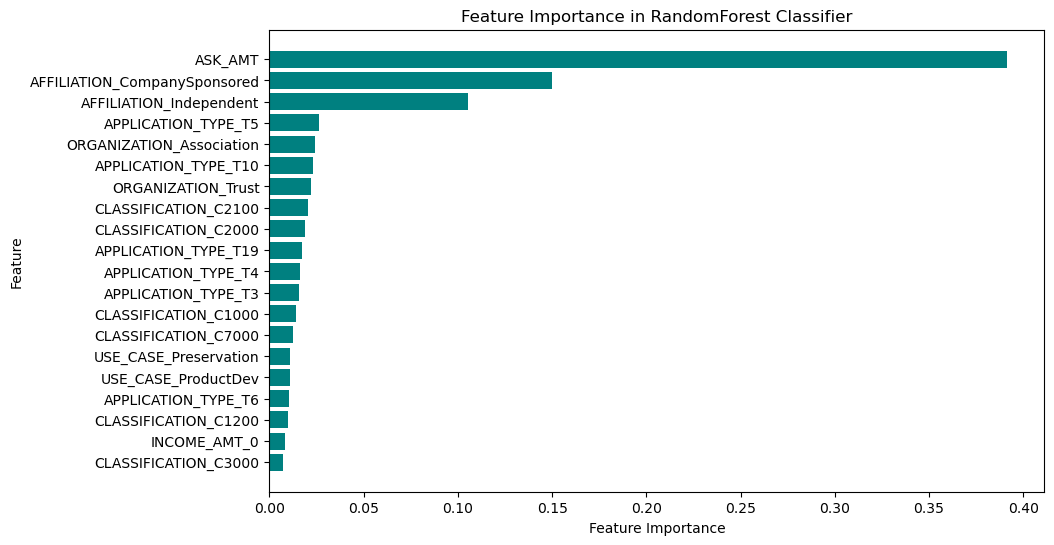

In [26]:
top_20_features = feature_importance_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_20_features["Feature"], top_20_features["Importance"], color='teal')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in RandomForest Classifier")
plt.gca().invert_yaxis()  # Puts most important features on top

plt.savefig('Resources/randomforest.png')

plt.show()

### RANDOM FOREST MODEL FINDINGS:
#### Top 5 Features' Importance in Order: ASK_AMT, AFFILIATION, APPLICATION_TYPE, CLASSIFICATION, ORGANIZATION
#### Exported the CSV to review all columns and adding the same categories under the same. For example, "CLASSIFICATION" included "CLASSIFICATION_C1000", "CLASSIFICATION_C1200", and so on. 

## Optimization
- Reduce Model complexity by reducing number of neurons
- Dropout regularization
- Adjust EarlyStopping
- Adjust epochs and batch size
- Add L2 regularization
- Activation method
- Feature selection based on importance

### Reduce complexity by reducing number of neurons

In [27]:
# Define the model with reduced complexity

model = Sequential()

# First hidden layer
model.add(Dense(32, input_dim = 78, activation = 'relu'))

# Second hidden layer
model.add(Dense(16, activation = "relu"))

# Output layer
model.add(Dense(1, activation = "sigmoid"))

# Check the structure of the model
model.summary()


/opt/anaconda3/envs/my_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │         2,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# EarlyStopping: Stop training if validation loss doesn't improve for 10 epochs
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights after stopping
)

# Train the model with both callbacks
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),  # Validation set
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6933 - loss: 0.6041 - val_accuracy: 0.7210 - val_loss: 0.5633
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7307 - loss: 0.5528 - val_accuracy: 0.7233 - val_loss: 0.5601
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7287 - loss: 0.5522 - val_accuracy: 0.7228 - val_loss: 0.5573
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7300 - loss: 0.5503 - val_accuracy: 0.7255 - val_loss: 0.5566
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7370 - loss: 0.5420 - val_accuracy: 0.7250 - val_loss: 0.5572
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7363 - loss: 0.5414 - val_accuracy: 0.7269 - val_loss: 0.5556
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7300 - loss: 0.5464 - val_accuracy: 0.7254 - val_loss: 0.5558
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7379 - loss: 0.5382 - val_accu

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss:.4f}, Accuracy: {model_accuracy:.4f}")

268/268 - 0s - 2ms/step - accuracy: 0.7291 - loss: 0.5534
Loss: 0.5534, Accuracy: 0.7291


### Create build_model function and test different Hyperparameters

In [31]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    
    # Choose activation function
    activation = hp.Choice('activation', ['relu', 'tanh', 'swish'])

    # L2 regularization strength
    reg_strength = hp.Float('reg_strength', min_value=0.0, max_value=0.1, step=0.01)
    
    # Input Layer + First Hidden Layer
    model.add(Dense(
        units=hp.Int('first_units', min_value=6, max_value=64, step=6),
        activation=activation,
        kernel_regularizer=regularizers.l2(reg_strength),
        input_shape=(78,)
    ))
    
    # Hidden Layers (1 to 6 layers with variable neurons)
    for i in range(hp.Int('num_layers', 1, 6)):  
        model.add(Dense(
            units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=8),
            activation=activation, 
            kernel_regularizer=regularizers.l2(reg_strength),
            kernel_initializer='he_normal'
        ))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))

    # Output Layer (Binary Classification)
    model.add(Dense(units=1, activation="sigmoid"))  
    
    # Tune batch size
    batch_size = hp.Choice('batch_size', [16, 32, 64])

    # Compile the model inside the function
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [32]:
# Initialize Keras Tuner - Hyperband Tuner
tuner = kt.Hyperband(
    build_model,
    objective='accuracy',
    max_epochs=10,  
    factor=3,
    directory='Resources/Model2/kt_results',
    project_name='model_optimization2.2'
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10, 
                           restore_best_weights=True)

# Run the hyperparameter search
tuner.search(
    X_train_scaled, y_train,
    epochs=10,
    validation_data=(X_test_scaled, y_test),
    batch_size=None,
    callbacks=[early_stop]
)

Trial 30 Complete [00h 00m 19s]
accuracy: 0.7203390002250671

Best accuracy So Far: 0.7342559695243835
Total elapsed time: 00h 04m 46s


In [33]:
# Get the best model and its hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

In [34]:
best_model.save('Resources/model2/AlphabetSoupCharity_Optimization.h5')

In [35]:
# Print all best hyperparameters

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
for key, value in best_hp.values.items():
    print(f"{key}: {value}")

# Access specific hyperparameters
best_activation = best_hp.get('activation')
best_first_units = best_hp.get('first_units')
best_num_layers = best_hp.get('num_layers')

print(f"Best Activation Function: {best_activation}")
print(f"Best First Layer Units: {best_first_units}")
print(f"Best Number of Hidden Layers: {best_num_layers}")

Best Hyperparameters:
activation: relu
reg_strength: 0.0
first_units: 18
num_layers: 1
units_0: 24
dropout_0: 0.1
batch_size: 32
learning_rate: 0.001
units_1: 32
dropout_1: 0.1
units_2: 104
dropout_2: 0.2
units_3: 48
dropout_3: 0.4
units_4: 56
dropout_4: 0.4
units_5: 112
dropout_5: 0.4
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Best Activation Function: relu
Best First Layer Units: 18
Best Number of Hidden Layers: 1


### Optimization: Features Selection

In [36]:
### Feature Selection Based on Importance. Selecting Top 3 Features based on Random Forest Model
features = ["IS_SUCCESSFUL", "ASK_AMT", "AFFILIATION_CompanySponsored", "AFFILIATION_Independent", 
           "AFFILIATION_Family/Parent", "AFFILIATION_National", "AFFILIATION_Regional",
           "AFFILIATION_Other", "APPLICATION_TYPE_T5", "APPLICATION_TYPE_T10", "APPLICATION_TYPE_T19", 
            "APPLICATION_TYPE_T4", "APPLICATION_TYPE_T3", "APPLICATION_TYPE_T6", "APPLICATION_TYPE_T8", 
            "APPLICATION_TYPE_T7", "APPLICATION_TYPE_Other"]
application_feat_df = application_df[features]
application_feat_df.head()


,IS_SUCCESSFUL,ASK_AMT,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Family/Parent,AFFILIATION_National,AFFILIATION_Regional,AFFILIATION_Other,APPLICATION_TYPE_T5,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T4,APPLICATION_TYPE_T3,APPLICATION_TYPE_T6,APPLICATION_TYPE_T8,APPLICATION_TYPE_T7,APPLICATION_TYPE_Other
0,1,5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,5000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,142590,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
# Split our preprocessed data into our features and target arrays
y = application_feat_df["IS_SUCCESSFUL"].values
X = application_feat_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [38]:
X_features = len(X_train[0])
X_features

16

In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
import keras_tuner as kt

def create_model(hp):
    model = Sequential()
    
    # Choose activation function
    activation = hp.Choice('activation', ['relu', 'tanh', 'swish'])
    
    # Input Layer + First Hidden Layer
    model.add(Dense(
        units=hp.Int('first_units', min_value=6, max_value=64, step=6),
        activation=activation,
        input_shape=(16,)
    ))
    
    # Hidden Layers (1 to 6 layers with variable neurons)
    for i in range(hp.Int('num_layers', 1, 6)):  
        model.add(Dense(
            units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=16),
            activation=activation, 
            kernel_initializer='he_normal'
        ))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer (Binary Classification)
    model.add(Dense(units=1, activation="sigmoid"))  
    
    # Tune batch size
    batch_size = hp.Choice('batch_size', [16, 32, 64])

    # Compile the model inside the function
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [41]:
# Initialize Keras Tuner - Hyperband Tuner
tuner = kt.Hyperband(
    create_model,
    objective='accuracy',
    max_epochs=10,  
    factor=3,
    directory='Resources/Model3/kt_results',
    project_name='model_optimization3.3'
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10, 
                           restore_best_weights=True)

# Run the hyperparameter search
tuner.search(
    X_train_scaled, y_train,
    epochs=10,
    validation_data=(X_test_scaled, y_test),
    batch_size=None,
    callbacks=[early_stop]
)



Trial 30 Complete [00h 00m 18s]
accuracy: 0.7221660614013672

Best accuracy So Far: 0.7242652773857117
Total elapsed time: 00h 05m 00s


In [42]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
for key, value in best_hp.values.items():
    print(f"{key}: {value}")
    



Best Hyperparameters:
activation: tanh
first_units: 12
num_layers: 3
units_0: 120
dropout_0: 0.30000000000000004
batch_size: 32
learning_rate: 0.001
units_1: 56
dropout_1: 0.2
units_2: 24
dropout_2: 0.30000000000000004
units_3: 104
dropout_3: 0.2
units_4: 72
dropout_4: 0.4
units_5: 56
dropout_5: 0.2
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019


### Remove all Features with less than 0.5 Feature Importance

In [43]:
# REMOVE ALL FEATURES WITH LESS THAN 0.05
features2=["INCOME_AMT_0", "INCOME_AMT_25000-99999", "INCOME_AMT_1M-5M", "INCOME_AMT_100000-499999", 
           "INCOME_AMT_1-9999", "INCOME_AMT_10M-50M", "INCOME_AMT_10000-24999", "INCOME_AMT_50M+", 
           "INCOME_AMT_5M-10M", "SPECIAL_CONSIDERATIONS_N", "SPECIAL_CONSIDERATIONS_Y", "STATUS", 
           "USE_CASE_ProductDev", "USE_CASE_Preservation", "USE_CASE_CommunityServ", "USE_CASE_Heathcare", 
           "USE_CASE_Other"]

application_feat2_df=application_df.drop(columns=features2)
application_feat2_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,CLASSIFICATION_C7120,CLASSIFICATION_C7200,CLASSIFICATION_C7210,CLASSIFICATION_C8000,CLASSIFICATION_C8200,CLASSIFICATION_Other,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
# Split our preprocessed data into our features and target arrays
y = application_feat2_df["IS_SUCCESSFUL"].values
X = application_feat2_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [45]:
X_features = len(X_train[0])
X_features

61

In [46]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
import keras_tuner as kt

def create_model(hp):
    model = Sequential()
    
    # Choose activation function
    activation = hp.Choice('activation', ['relu', 'tanh', 'swish'])
    
    # Input Layer + First Hidden Layer
    model.add(Dense(
        units=hp.Int('first_units', min_value=6, max_value=64, step=6),
        activation=activation,
        input_shape=(61,)
    ))
    
    # Hidden Layers (1 to 6 layers with variable neurons)
    for i in range(hp.Int('num_layers', 1, 6)):  
        model.add(Dense(
            units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=16),
            activation=activation, 
            kernel_initializer='he_normal'
        ))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer (Binary Classification)
    model.add(Dense(units=1, activation="sigmoid"))  
    
    # Tune batch size
    batch_size = hp.Choice('batch_size', [16, 32, 64])

    # Compile the model inside the function
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [48]:
# Initialize Keras Tuner - Hyperband Tuner
tuner = kt.Hyperband(
    create_model,
    objective='accuracy',
    max_epochs=10,  
    factor=3,
    directory='Resources/Model3/kt_results',
    project_name='model_optimization4.4'
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10, 
                           restore_best_weights=True)

# Run the hyperparameter search
tuner.search(
    X_train_scaled, y_train,
    epochs=10,
    validation_data=(X_test_scaled, y_test),
    batch_size=None,
    callbacks=[early_stop]
)



Trial 30 Complete [00h 00m 26s]
accuracy: 0.7147411108016968

Best accuracy So Far: 0.7281915545463562
Total elapsed time: 00h 05m 11s


In [49]:
# Get the best model and its hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
for key, value in best_hp.values.items():
    print(f"{key}: {value}")


Best Hyperparameters:
activation: relu
first_units: 48
num_layers: 3
units_0: 120
dropout_0: 0.2
batch_size: 32
learning_rate: 0.001
units_1: 40
dropout_1: 0.4
units_2: 104
dropout_2: 0.30000000000000004
units_3: 104
dropout_3: 0.4
units_4: 8
dropout_4: 0.2
units_5: 104
dropout_5: 0.30000000000000004
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
